In [1]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('combined.csv')

import pandas as pd

# 파일 경로 설정
file_path = 'combined.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 전치
transposed_df = df.transpose()

# 전치된 데이터를 새로운 CSV 파일로 저장
transposed_file_path = 'transposed_combined.csv'
transposed_df.to_csv(transposed_file_path, index=False)


In [6]:
# 14번째 행을 헤더로 사용하고, 첫 번째 행을 삭제

# 전치된 데이터를 다시 읽기
transposed_df = pd.read_csv(transposed_file_path, header=None)

# 14번째 행을 헤더로 설정
new_header = transposed_df.iloc[13]  # 14번째 행 (0부터 시작하는 인덱스를 고려)
transposed_df = transposed_df[14:]   # 14번째 행 이후의 데이터만 남김
transposed_df.columns = new_header   # 새 헤더 적용

# 첫 번째 행 삭제 (이미 14번째 행을 헤더로 설정한 후이므로, 실제로는 15번째 행이 첫 번째 행이 됨)
transposed_df = transposed_df.iloc[1:]

# 결과 저장
updated_file_path = '/mnt/data/updated_transposed_combined.csv'
transposed_df.to_csv(updated_file_path, index=False)
updated_file_path



'team_stas.csv'

In [ ]:
# 'Player' 열에서 'DNW'가 포함된 행만 추출
df_DNW_m = df[df['Player'].str.contains('DNW')]

# 결과 확인
print(df_DNW_m)
df_DNW_m

In [2]:
attacker_columns = ['Kills', 'Assists', 'Damage Dealt', 'Headshot Kills', 'Longest Kill (m)']
stealer_columns = ['Stolen Kills', 'Lost Kills']
teammate_columns = ['Revives', 'Knocked', 'Revived']
survivor_columns = ['Time Survived', 'Avg Time Survived', 'Damage Taken', 'Heals', 'Health Recovered', 'Boosts']
utility_columns = ['Grenades Picked', 'Grenades Thrown', 'Molotovs Thrown', 'Smokes Thrown', 'Flashes Thrown']
finisher_columns = ['Kills/Knocks', 'Damage Dealt/Damage Taken']

In [3]:
all_columns = attacker_columns + stealer_columns + teammate_columns + survivor_columns + utility_columns + finisher_columns

# 필요한 컬럼들만으로 데이터프레임을 필터링합니다
filtered_df = df_DNW_m[all_columns]

In [4]:
filtered_df

,Kills,Assists,Damage Dealt,Headshot Kills,Longest Kill (m),Stolen Kills,Lost Kills,Revives,Knocked,Revived,...,Heals,Health Recovered,Boosts,Grenades Picked,Grenades Thrown,Molotovs Thrown,Smokes Thrown,Flashes Thrown,Kills/Knocks,Damage Dealt/Damage Taken
1,13,2,2242.2,6,277.5,2,0,2,5,1,...,23,1157.8,26,15,7,2,15,3,1.2,1.5
13,7,2,1936.2,2,593.9,3,2,1,6,2,...,15,778.3,26,21,12,4,10,5,1.0,1.6
25,3,5,1409.0,1,58.1,2,1,2,6,1,...,13,731.2,32,16,7,0,13,0,0.8,1.2
42,5,0,971.9,0,178.3,1,0,0,6,1,...,7,553.2,21,14,7,1,13,0,1.3,1.0


In [5]:
filtered_df.describe()
m_df = filtered_df
m_df 

,Kills,Assists,Damage Dealt,Headshot Kills,Longest Kill (m),Stolen Kills,Lost Kills,Revives,Knocked,Revived,...,Heals,Health Recovered,Boosts,Grenades Picked,Grenades Thrown,Molotovs Thrown,Smokes Thrown,Flashes Thrown,Kills/Knocks,Damage Dealt/Damage Taken
1,13,2,2242.2,6,277.5,2,0,2,5,1,...,23,1157.8,26,15,7,2,15,3,1.2,1.5
13,7,2,1936.2,2,593.9,3,2,1,6,2,...,15,778.3,26,21,12,4,10,5,1.0,1.6
25,3,5,1409.0,1,58.1,2,1,2,6,1,...,13,731.2,32,16,7,0,13,0,0.8,1.2
42,5,0,971.9,0,178.3,1,0,0,6,1,...,7,553.2,21,14,7,1,13,0,1.3,1.0


In [6]:
def category_scores(data, columns):
    return sum(data[col] for col in columns if isinstance(data[col], (int, float)))

for index, data in m_df .iterrows():
    attacker_score = category_scores(data, attacker_columns)
    stealer_score = category_scores(data, stealer_columns)
    teammate_score = category_scores(data, teammate_columns)
    survivor_score = category_scores(data, survivor_columns)
    utility_score = category_scores(data, utility_columns)
    finisher_score = category_scores(data, finisher_columns)
    
    player_scores = {
        'attacker_score': attacker_score,
        'stealer_score': stealer_score,
        'teammate_score': teammate_score,
        'survivor_score': survivor_score,
        'utility_score': utility_score,
        'finisher_score': finisher_score
    }
    
    print(f"Player {index} scores: {player_scores}")


Player 1 scores: {'attacker_score': 2540.7, 'stealer_score': 2, 'teammate_score': 8, 'survivor_score': 2974.6, 'utility_score': 42, 'finisher_score': 2.7}
Player 13 scores: {'attacker_score': 2541.1, 'stealer_score': 5, 'teammate_score': 9, 'survivor_score': 2219.3, 'utility_score': 52, 'finisher_score': 2.6}
Player 25 scores: {'attacker_score': 1476.1, 'stealer_score': 3, 'teammate_score': 9, 'survivor_score': 2117.4, 'utility_score': 36, 'finisher_score': 2.0}
Player 42 scores: {'attacker_score': 1155.2, 'stealer_score': 1, 'teammate_score': 7, 'survivor_score': 1744.4, 'utility_score': 35, 'finisher_score': 2.3}


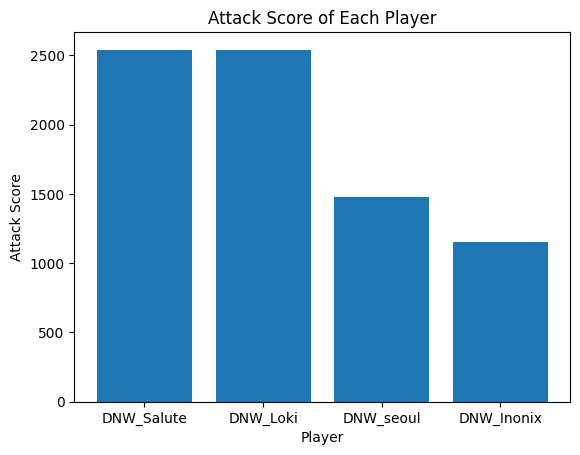

In [7]:
import matplotlib.pyplot as plt

players = ['DNW_Salute', 'DNW_Loki', 'DNW_seoul', 'DNW_Inonix']
attack_scores = [2540.7, 2541.1, 1476.1, 1155.2]

plt.bar(players, attack_scores)
plt.xlabel('Player')
plt.ylabel('Attack Score')
plt.title('Attack Score of Each Player')
plt.show()


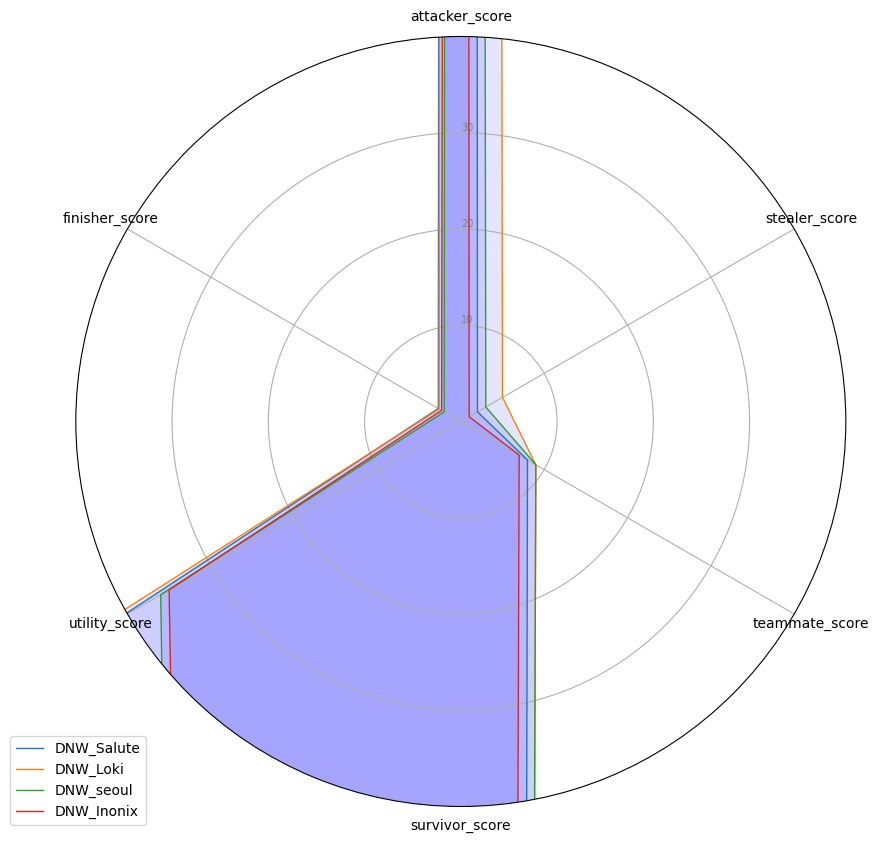

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 각 플레이어의 점수
scores = {
    'DNW_Salute': {'attacker_score': 2540.7, 'stealer_score': 2, 'teammate_score': 8, 'survivor_score': 2974.6, 'utility_score': 42, 'finisher_score': 2.7},
    'DNW_Loki': {'attacker_score': 2541.1, 'stealer_score': 5, 'teammate_score': 9, 'survivor_score': 2219.3, 'utility_score': 52, 'finisher_score': 2.6},
    'DNW_seoul': {'attacker_score': 1476.1, 'stealer_score': 3, 'teammate_score': 9, 'survivor_score': 2117.4, 'utility_score': 36, 'finisher_score': 2.0},
    'DNW_Inonix': {'attacker_score': 1155.2, 'stealer_score': 1, 'teammate_score': 7, 'survivor_score': 1744.4, 'utility_score': 35, 'finisher_score': 2.3}
}

categories = list(scores['DNW_Salute'].keys())
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
plt.ylim(0, 40)

for player, player_scores in scores.items():
    values = list(player_scores.values())
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=player)
    ax.fill(angles, values, 'b', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
